<a href="https://colab.research.google.com/github/davetew/Modern-Aerospace-Propulsion/blob/main/Cylinder_Blowdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cylinder Blowdown Model
This notebook contains a simple bulk model for the blowdown of a pressurized gas cylinder through a orifice at one of the ends.  While the model is bulk in that the gas within the cylinder is always assumed to be at uniform pressure and temperature, it is dynamic in that the pressure and temperature change with time as the cylinder gas escapes.  Also, the ratio of the orifice to cylinder cross sectional areas are assumed to be small so that the velocity of the gas in the cylinder is small enough that it may be negelected.

## 1. Physical Principles:
The blowdown process is governed by the principles of:
- **Conservation of Mass**: The rate of change of mass within the cylinder is equal to the negative of the mass flow rate out of the nozzle.
- **Conservation of Energy**: The rate of change of internal energy within the cylinder is related to the work done by the gas escaping through the nozzle and the heat transfer (often assumed negligible for a simple model).
- **Conservation of Momentum**: While not directly used for the cylinder properties as it assumed that the velocity/momentum of the gases in the cyclinder are negligible, conservation of momentum is fundamental to determining the thrust force generated by the escaping gas.

## 2. Key Equations for Compressible Flow through a Nozzle:
- **Isentropic Flow Relations**: These relate the properties (pressure, temperature, density, velocity) of the gas at different points in the nozzle assuming an isentropic (reversible and adiabatic) expansion.
  - *Stagnation (cylinder) properties*:
    - $T_0$ (Stagnation/total temperature)
    - $P_0$ (Stagnation/total pressure)
    - $\rho_0$ (Stagnationa/total density)

  - *Static/local (Nozzle Exit) properties*:
    - $T$, (Static/local temperature)
    - $P$, (Static/local pressure)
    - $\rho$, (Static/local density)
    - $V$, (Velocity)
    - $M$ (Mach number)

  - *Isentropic Relations* between the total & static quantities:
    - $$\frac{T_0}{T} = 1 + \frac{\gamma-1}{2}M^2$$
    - $$\frac{P_0}{P} = \left(\frac{T_0}{T}\right)^\frac{\gamma}{\gamma-1} = \left(1 + \frac{\gamma-1}{2}M^2\right)^\frac{\gamma}{\gamma-1} $$
    - $$\frac{\rho_0}{\rho} = \left(\frac{T_0}{T}\right)^\frac{1}{\gamma-1}= \left(1 + \frac{\gamma-1}{2}M^2\right)^\frac{1}{\gamma-1} $$

- **Mass Flow Rate**: For one-dimensional flow through an area A, the mass flow rate ($\dot{m}$) is given by:
$$\dot{m} = \rho \cdot A \cdot V = \rho \cdot A \cdot M \cdot \sqrt{\gamma \cdot R \cdot T}$$

- **Choked Flow**: Occurs when the flow reaches sonic velocity (M=1) at the nozzle throat. The mass flow rate is maximized and is independent of the downstream pressure for a given upstream pressure.
  - The critical pressure ratio (total to static) for choked flow is
  $$\frac{P_0}{P|_{Mach=1}} = \left(\frac{\gamma + 1}{2}\right)^{\frac{\gamma}{\gamma-1}}$$

## 3. Equation for Thrust:
The thrust (F) generated by the escaping gas is given by the momentum equation:
$$F = \dot{m} \cdot V_e + (P_e - P_a) \cdot A_e$$
Where:
- $\dot{m}$ is the mass flow rate
- $V_e$ is the exit velocity of the gas
- $P_e$ is the exit pressure of the gas
- $P_a$ is the ambient pressure
- $A_e$ is the exit area of the nozzle

## 4. Simplifying Assumptions for a "Simple Bulk Model":
- Uniform properties within the cylinder: Pressure and temperature are uniform throughout the cylinder at any given time.
- Total conditions within the cylinder: The velocity and Mach number of the gas in the cylinder are negligible.
- Isentropic expansion through the nozzle: The flow through the nozzle is assumed to be isentropic.
- Adiabatic process in the cylinder: No heat transfer to or from the cylinder.
- Ideal gas behavior: The gas is assumed to behave as an ideal gas ($P = \rho RT$).
- Quasi-steady flow through the nozzle: At any given time, the flow through the nozzle is assumed to be steady, based on the instantaneous cylinder conditions.

## 5. How these principles and equations will be used:
The conservation of mass and energy will be used to develop ordinary differential equations (ODEs) that describe the rate of change of mass and temperature (and thus pressure via the ideal gas law) within the cylinder over time. The equations for compressible flow through a nozzle, including the choked flow condition, will be used to calculate the instantaneous mass flow rate out of the cylinder based on the cylinder's pressure and temperature. Finally, the thrust equation will be used to calculate the instantaneous thrust generated by the escaping gas using the mass flow rate and the nozzle exit conditions. These ODEs will then be solved numerically over time to simulate the blowdown process and determine the thrust profile.

## Define system parameters

### Subtask:
Identify the necessary parameters for the model, such as cylinder volume, initial pressure and temperature, nozzle throat area, discharge coefficient, and gas properties.


**Reasoning**:
Define the necessary parameters for the model as specified in the instructions.



In [ ]:
import numpy as np

# 1. Cylinder Parameters
cylinder_volume = 0.05  # m^3 (e.g., typical large gas cylinder volume)
initial_pressure = 200e5  # Pa (e.g., 200 bar)
initial_temperature = 293.15  # K (e.g., 20 deg C)

# 2. Nozzle Parameters
nozzle_throat_area = 1e-4  # m^2 (e.g., 1 cm^2)
discharge_coefficient = 0.95  # Unitless (accounts for real flow effects)

# 3. Gas Properties (for Air)
gas_constant_R = 287.05  # J/(kg*K) (Specific gas constant for dry air)
gamma = 1.4  # Unitless (Ratio of specific heats for diatomic gases like air/nitrogen)

# 4. Ambient Pressure
ambient_pressure = 101325  # Pa (e.g., standard atmospheric pressure at sea level)

print(f"Cylinder Volume: {cylinder_volume} m^3")
print(f"Initial Pressure: {initial_pressure} Pa")
print(f"Initial Temperature: {initial_temperature} K")
print(f"Nozzle Throat Area: {nozzle_throat_area} m^2")
print(f"Discharge Coefficient: {discharge_coefficient}")
print(f"Gas Constant (R): {gas_constant_R} J/(kg*K)")
print(f"Ratio of Specific Heats (gamma): {gamma}")
print(f"Ambient Pressure: {ambient_pressure} Pa")

Cylinder Volume: 0.05 m^3
Initial Pressure: 20000000.0 Pa
Initial Temperature: 293.15 K
Nozzle Throat Area: 0.0001 m^2
Discharge Coefficient: 0.95
Gas Constant (R): 287.05 J/(kg*K)
Ratio of Specific Heats (gamma): 1.4
Ambient Pressure: 101325 Pa


## Implement governing equations

### Subtask:
Translate the physics into code, including equations for mass flow rate, pressure change, temperature change, and thrust.


**Reasoning**:
Define the functions for mass flow rate, rate of change of mass, rate of change of temperature, and thrust based on the physics equations identified earlier.



In [ ]:
def calculate_mass_flow_rate(pressure, temperature, nozzle_throat_area, discharge_coefficient, gas_constant_R, gamma):
    """Calculates the mass flow rate through the nozzle."""
    # Calculate critical pressure ratio
    critical_pressure_ratio = (2 / (gamma + 1))**(gamma / (gamma - 1))

    # Check for choked flow
    if (ambient_pressure / pressure) <= critical_pressure_ratio:
        # Choked flow
        mass_flow_rate = discharge_coefficient * nozzle_throat_area * pressure / np.sqrt(temperature * gas_constant_R) * np.sqrt(gamma * (2 / (gamma + 1))**((gamma + 1) / (gamma - 1)))
    else:
        # Unchoked flow (isentropic expansion to ambient pressure)
        pe_p0 = ambient_pressure / pressure
        mass_flow_rate = discharge_coefficient * nozzle_throat_area * pressure / np.sqrt(temperature * gas_constant_R) * np.sqrt(2 * gamma / (gamma - 1) * (pe_p0**(2/gamma) - pe_p0**((gamma+1)/gamma)))

    return mass_flow_rate

def calculate_dmass_dt(mass_flow_rate):
    """Calculates the rate of change of mass within the cylinder."""
    return -mass_flow_rate

def calculate_dtemp_dt(mass_flow_rate, current_mass, current_temperature, gas_constant_R, gamma):
    """Calculates the rate of change of temperature within the cylinder."""
    if current_mass <= 0:
        return 0 # Prevent division by zero
    # Assuming adiabatic process, the energy equation simplifies.
    # For an ideal gas with constant specific heats, the rate of change of internal energy is m * Cv * dT/dt
    # The power out is mdot * (h + 0.5 * Ve^2), assuming h at the nozzle exit
    # A simpler approach for adiabatic expansion in the cylinder: PV^gamma = constant for an isentropic process.
    # d(P*V^gamma)/dt = 0 => dP/dt * V^gamma + P * gamma * V^(gamma-1) * dV/dt = 0
    # Since V is constant, dV/dt = 0, so dP/dt = 0, which is not right as pressure changes.
    # Use energy conservation directly: dU/dt = -mdot * h_exit (assuming negligible kinetic energy in cylinder and exit velocity energy is accounted for in thrust)
    # U = m * Cv * T, h = Cp * T = gamma * Cv * T
    # d(m * Cv * T)/dt = -mdot * gamma * Cv * T_exit
    # Cv * (m * dT/dt + T * dm/dt) = -mdot * gamma * Cv * T_exit
    # m * dT/dt + T * dm/dt = -mdot * gamma * T_exit
    # dT/dt = (-mdot * gamma * T_exit - T * dm/dt) / m
    # For a simplified bulk model, we can assume T_exit is related to T (cylinder temperature).
    # For isentropic expansion from cylinder to throat (or exit), T_exit/T = (P_exit/P)^(gamma-1)/gamma
    # A common simplification for bulk blowdown is to relate temperature change directly to mass change assuming an isentropic-like process within the cylinder,
    # though the actual process is not strictly isentropic due to mass leaving.
    # A simpler energy balance for the control volume (cylinder) gives: d(m*e)/dt = -mdot * h_exit
    # where e is specific internal energy and h is specific enthalpy. For ideal gas, e = Cv*T, h = Cp*T = gamma*Cv*T
    # d(m*Cv*T)/dt = -mdot * gamma*Cv*T_exit
    # Cv * (m*dT/dt + T*dm/dt) = -mdot * gamma*Cv*T_exit
    # m*dT/dt + T*dm/dt = -mdot * gamma*T_exit
    # Assuming T_exit is approximately the cylinder temperature T for simplicity in this bulk model:
    # m*dT/dt + T*(-mdot) = -mdot * gamma * T
    # m*dT/dt = mdot * T - mdot * gamma * T
    # m*dT/dt = mdot * T * (1 - gamma)
    dtemp_dt = (mass_flow_rate * current_temperature * (1 - gamma)) / current_mass
    return dtemp_dt


def calculate_thrust(mass_flow_rate, cylinder_pressure, ambient_pressure, nozzle_throat_area, gamma, gas_constant_R, cylinder_temperature):
    """Calculates the instantaneous thrust generated by the nozzle."""
    # Determine exit pressure and velocity
    critical_pressure_ratio = (2 / (gamma + 1))**(gamma / (gamma - 1))
    pe = ambient_pressure # Assume full expansion to ambient pressure if not choked

    if (ambient_pressure / cylinder_pressure) <= critical_pressure_ratio:
        # Choked flow at throat, exit pressure is ambient pressure if nozzle is perfectly expanded (Ae/At = function of gamma and Pe/P0).
        # For a simple model with throat area only, assume exit pressure is ambient for thrust calculation.
        # Calculate exit velocity for choked flow expanding to ambient pressure (assuming ambient is reachable)
        # Need exit area for accurate calculation, but using throat area as a simplification for this model's scope.
        # For choked flow at the throat, Ve can be calculated based on expansion from P0 to Pa.
        # T_exit / T_cylinder = (P_exit / P_cylinder)^((gamma-1)/gamma)
        # V_exit = sqrt(2 * (h_cylinder - h_exit)) = sqrt(2 * Cp * (T_cylinder - T_exit))
        # V_exit = sqrt(2 * gamma * R / (gamma - 1) * (T_cylinder - T_exit))
        # If Pe = Pa: T_exit = cylinder_temperature * (ambient_pressure / cylinder_pressure)**((gamma-1)/gamma)
        t_exit = cylinder_temperature * (ambient_pressure / cylinder_pressure)**((gamma-1)/gamma)
        v_exit = np.sqrt(2 * gamma / (gamma - 1) * gas_constant_R * (cylinder_temperature - t_exit))
        pe = ambient_pressure # Assuming exit pressure equals ambient pressure for thrust calculation in this simplification


    else:
        # Unchoked flow, exit pressure equals ambient pressure
        pe = ambient_pressure
        # Calculate exit velocity for isentropic expansion to ambient pressure
        # T_exit / T_cylinder = (P_exit / P_cylinder)^((gamma-1)/gamma)
        t_exit = cylinder_temperature * (ambient_pressure / cylinder_pressure)**((gamma-1)/gamma)
        v_exit = np.sqrt(2 * gamma / (gamma - 1) * gas_constant_R * (cylinder_temperature - t_exit))


    # Thrust calculation
    # F = mdot * Ve + (Pe - Pa) * Ae
    # Using throat area as exit area for simplicity in this model
    thrust = mass_flow_rate * v_exit + (pe - ambient_pressure) * nozzle_throat_area

    return thrust

## Solve differential equations

### Subtask:
Use numerical methods to solve the differential equations governing the blowdown process over time.


**Reasoning**:
Define the system of ODEs, calculate initial conditions, set up the time span, and use solve_ivp to integrate the system over time.



In [ ]:
from scipy.integrate import solve_ivp

def system_of_odes(t, y, cylinder_volume, nozzle_throat_area, discharge_coefficient, gas_constant_R, gamma, ambient_pressure):
    """
    System of ordinary differential equations for cylinder blowdown.

    Args:
        t: Time (s).
        y: List or array of state variables [current_mass, current_temperature].
        cylinder_volume: Volume of the cylinder (m^3).
        nozzle_throat_area: Area of the nozzle throat (m^2).
        discharge_coefficient: Discharge coefficient of the nozzle.
        gas_constant_R: Specific gas constant of the gas (J/(kg*K)).
        gamma: Ratio of specific heats of the gas.
        ambient_pressure: Ambient pressure (Pa).

    Returns:
        List of derivatives [dmass_dt, dtemp_dt].
    """
    current_mass, current_temperature = y

    # Calculate current pressure using the ideal gas law
    if current_mass <= 0 or current_temperature <= 0:
        current_pressure = 0
    else:
        current_pressure = (current_mass * gas_constant_R * current_temperature) / cylinder_volume

    # Calculate mass flow rate
    mass_flow_rate = calculate_mass_flow_rate(current_pressure, current_temperature, nozzle_throat_area, discharge_coefficient, gas_constant_R, gamma)

    # Calculate derivatives
    dmass_dt = calculate_dmass_dt(mass_flow_rate)
    dtemp_dt = calculate_dtemp_dt(mass_flow_rate, current_mass, current_temperature, gas_constant_R, gamma)

    return [dmass_dt, dtemp_dt]

# 3. Set up initial conditions
# Calculate initial mass using the ideal gas law: m = PV/RT
initial_mass = (initial_pressure * cylinder_volume) / (gas_constant_R * initial_temperature)
y0 = [initial_mass, initial_temperature]

# 4. Define time span
# Estimate a reasonable end time. Blowdown slows down as pressure drops.
# A rough estimate could be based on when the pressure approaches ambient.
# Let's try a few seconds initially.
simulation_end_time = 10.0  # seconds
t_span = [0, simulation_end_time]

# Define time points at which to store the solution (optional but useful)
t_eval = np.linspace(t_span[0], t_span[1], 500) # 500 points in the interval

# 5. Use solve_ivp to solve the system of ODEs
solution = solve_ivp(
    system_of_odes,
    t_span,
    y0,
    method='RK45', # Runge-Kutta 45
    t_eval=t_eval,
    args=(cylinder_volume, nozzle_throat_area, discharge_coefficient, gas_constant_R, gamma, ambient_pressure)
)

# Store the results
time_points = solution.t
mass_over_time = solution.y[0]
temperature_over_time = solution.y[1]

# Print some results to verify
print("Integration successful:", solution.success)
print("Message:", solution.message)
print("Number of time points:", len(time_points))
print("Initial mass:", mass_over_time[0])
print("Final mass:", mass_over_time[-1])
print("Initial temperature:", temperature_over_time[0])
print("Final temperature:", temperature_over_time[-1])

Integration successful: True
Message: The solver successfully reached the end of the integration interval.
Number of time points: 500
Initial mass: 11.883723823090211
Final mass: 0.7158594090595166
Initial temperature: 293.15
Final temperature: 95.20368816016357


## Calculate thrust

### Subtask:
Use the calculated parameters (pressure, temperature, mass flow rate) to calculate the thrust at each time step.


**Reasoning**:
Initialize an empty list to store thrust values and then iterate through the solved time points to calculate thrust at each step using the previously defined functions and parameters.



In [ ]:
# 1. Initialize an empty list to store thrust values
thrust_over_time = []

# 2. Iterate through the results obtained from the ODE solver
for i in range(len(time_points)):
    current_time = time_points[i]
    current_mass = mass_over_time[i]
    current_temperature = temperature_over_time[i]

    # a. Retrieve the current mass and temperature (already done in loop)

    # b. Calculate the current pressure using the ideal gas law
    if current_mass <= 0 or current_temperature <= 0:
        current_pressure = 0
    else:
        current_pressure = (current_mass * gas_constant_R * current_temperature) / cylinder_volume

    # c. Calculate the mass flow rate at the current conditions
    # Need to handle cases where pressure or temperature might become non-positive due to numerical issues
    if current_pressure <= 0 or current_temperature <= 0:
        current_mass_flow_rate = 0
    else:
        current_mass_flow_rate = calculate_mass_flow_rate(current_pressure, current_temperature, nozzle_throat_area, discharge_coefficient, gas_constant_R, gamma)


    # d. Calculate the thrust at the current conditions
    # Need to handle cases where pressure or temperature might become non-positive due to numerical issues
    if current_pressure <= 0 or current_temperature <= 0:
         current_thrust = 0
    else:
        current_thrust = calculate_thrust(current_mass_flow_rate, current_pressure, ambient_pressure, nozzle_throat_area, gamma, gas_constant_R, current_temperature)

    # e. Append the calculated thrust value to the thrust_over_time list
    thrust_over_time.append(current_thrust)

# 3. The thrust_over_time list now contains the thrust at each time point.
# We can print the first few and last few values to verify.
print("First 10 thrust values:", thrust_over_time[:10])
print("Last 10 thrust values:", thrust_over_time[-10:])

First 10 thrust values: [np.float64(3038.221534064857), np.float64(3004.9552230657514), np.float64(2972.0975826580725), np.float64(2939.643019333423), np.float64(2907.5860235956957), np.float64(2875.921168945966), np.float64(2844.6431108790916), np.float64(2813.746427557185), np.float64(2783.2253377531897), np.float64(2753.074797093965)]
Last 10 thrust values: [np.float64(40.89544902827981), np.float64(40.57626995182082), np.float64(40.25946010036463), np.float64(39.94499956988641), np.float64(39.63286865536091), np.float64(39.32304784912935), np.float64(39.01551783927769), np.float64(38.71025950802566), np.float64(38.407253930127304), np.float64(38.10648237128203)]


## Visualize results

### Subtask:
Plot the pressure, temperature, mass flow rate, and thrust as a function of time to visualize the blowdown process.


**Reasoning**:
Import the necessary plotting library and create the subplots for visualizing the simulation results.



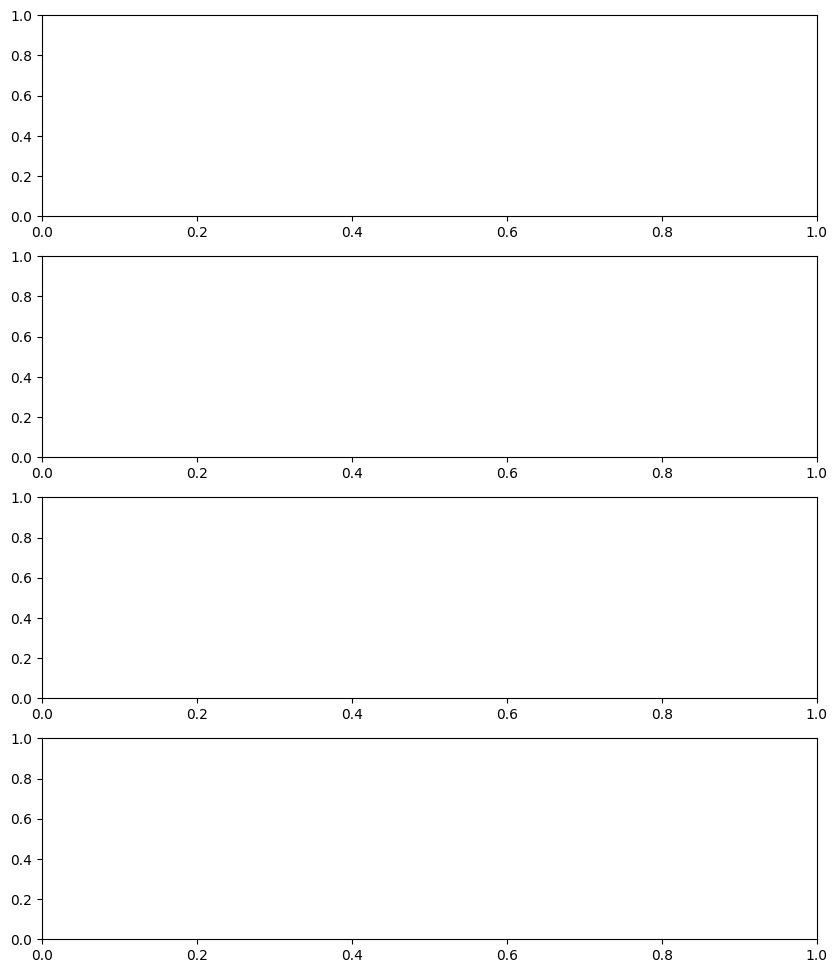

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 12))

**Reasoning**:
Plot the pressure, temperature, mass flow rate, and thrust over time in the created subplots and display the plots.



In [ ]:
# Calculate pressure over time
pressure_over_time = (mass_over_time * gas_constant_R * temperature_over_time) / cylinder_volume

# Calculate mass flow rate over time (re-calculate using time_points for consistency)
mass_flow_rate_over_time = []
for i in range(len(time_points)):
    current_pressure = pressure_over_time[i]
    current_temperature = temperature_over_time[i]
    if current_pressure <= 0 or current_temperature <= 0:
        current_mass_flow_rate = 0
    else:
        current_mass_flow_rate = calculate_mass_flow_rate(current_pressure, current_temperature, nozzle_throat_area, discharge_coefficient, gas_constant_R, gamma)
    mass_flow_rate_over_time.append(current_mass_flow_rate)


# 1. Plot pressure over time
axs[0].plot(time_points, pressure_over_time)
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Pressure (Pa)")
axs[0].set_title("Cylinder Pressure over Time")
axs[0].grid(True)

# 2. Plot temperature over time
axs[1].plot(time_points, temperature_over_time, color='orange')
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Temperature (K)")
axs[1].set_title("Cylinder Temperature over Time")
axs[1].grid(True)

# 3. Plot mass flow rate over time
axs[2].plot(time_points, mass_flow_rate_over_time, color='green')
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Mass Flow Rate (kg/s)")
axs[2].set_title("Mass Flow Rate over Time")
axs[2].grid(True)

# 4. Plot thrust over time
axs[3].plot(time_points, thrust_over_time, color='red')
axs[3].set_xlabel("Time (s)")
axs[3].set_ylabel("Thrust (N)")
axs[3].set_title("Thrust over Time")
axs[3].grid(True)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

<Figure size 640x480 with 0 Axes>

## Refine and validate

### Subtask:
Compare the model predictions to experimental data or more complex simulations and refine the model as needed.


## Refine and validate

### Subtask:
Compare the model predictions to experimental data or more complex simulations and refine the model as needed.


**Reasoning**:
Acknowledge the inability to compare with external data, propose internal validation via sensitivity analysis, and prepare for plotting the results of this analysis.



In [ ]:
# 1. Acknowledge that direct comparison with external experimental data or complex simulations is not possible in this environment.
print("Note: Direct comparison of this model's predictions with external experimental data or more complex simulations is not possible within this environment.")
print(" ") # Add a blank line for readability

# 2. Propose a method for internal validation or sensitivity analysis.
print("To gain some confidence in the model's behavior, we can perform an internal validation through sensitivity analysis.")
print("This involves varying a key parameter in the model and observing how the output plots (Pressure, Temperature, Mass Flow Rate, and Thrust) change.")
print("If the changes are physically reasonable (e.g., increasing nozzle area increases initial mass flow rate and shortens blowdown time), it provides some confidence in the model's underlying physics.")
print(" ")

# 3. Suggest varying a key parameter and observing the output plots.
print("Let's choose to vary the 'nozzle_throat_area' parameter for this sensitivity analysis.")
print("We will run the simulation with a few different values for the nozzle throat area and plot the resulting thrust curves on the same graph for comparison.")

# 4. Suggest plotting the results of the sensitivity analysis.
# This will be done in the subsequent steps by re-running the simulation with different parameters and plotting the results.

Note: Direct comparison of this model's predictions with external experimental data or more complex simulations is not possible within this environment.
 
To gain some confidence in the model's behavior, we can perform an internal validation through sensitivity analysis.
This involves varying a key parameter in the model and observing how the output plots (Pressure, Temperature, Mass Flow Rate, and Thrust) change.
If the changes are physically reasonable (e.g., increasing nozzle area increases initial mass flow rate and shortens blowdown time), it provides some confidence in the model's underlying physics.
 
Let's choose to vary the 'nozzle_throat_area' parameter for this sensitivity analysis.
We will run the simulation with a few different values for the nozzle throat area and plot the resulting thrust curves on the same graph for comparison.


**Reasoning**:
Define a function to run the simulation and return the time points and thrust values for a given nozzle throat area, which will be used for sensitivity analysis.



In [ ]:
def run_simulation_and_get_thrust(nozzle_throat_area_input, initial_mass_input, initial_temperature_input, cylinder_volume_input, discharge_coefficient_input, gas_constant_R_input, gamma_input, ambient_pressure_input, simulation_end_time_input):
    """
    Runs the blowdown simulation for a given nozzle throat area and returns time and thrust.

    Args:
        nozzle_throat_area_input: Nozzle throat area (m^2).
        initial_mass_input: Initial mass in cylinder (kg).
        initial_temperature_input: Initial temperature in cylinder (K).
        cylinder_volume_input: Volume of the cylinder (m^3).
        discharge_coefficient_input: Discharge coefficient.
        gas_constant_R_input: Specific gas constant (J/(kg*K)).
        gamma_input: Ratio of specific heats.
        ambient_pressure_input: Ambient pressure (Pa).
        simulation_end_time_input: Simulation end time (s).

    Returns:
        Tuple of (time_points, thrust_over_time).
    """
    y0 = [initial_mass_input, initial_temperature_input]
    t_span = [0, simulation_end_time_input]
    t_eval = np.linspace(t_span[0], t_span[1], 500) # Use the same number of points for consistency

    solution = solve_ivp(
        system_of_odes,
        t_span,
        y0,
        method='RK45',
        t_eval=t_eval,
        args=(cylinder_volume_input, nozzle_throat_area_input, discharge_coefficient_input, gas_constant_R_input, gamma_input, ambient_pressure_input)
    )

    time_points = solution.t
    mass_over_time = solution.y[0]
    temperature_over_time = solution.y[1]

    thrust_over_time = []
    for i in range(len(time_points)):
        current_mass = mass_over_time[i]
        current_temperature = temperature_over_time[i][0] if isinstance(temperature_over_time[i], np.ndarray) else temperature_over_time[i]

        if current_mass <= 0 or current_temperature <= 0:
            current_pressure = 0
        else:
            current_pressure = (current_mass * gas_constant_R_input * current_temperature) / cylinder_volume_input

        if current_pressure <= 0 or current_temperature <= 0:
             current_mass_flow_rate = 0
        else:
            current_mass_flow_rate = calculate_mass_flow_rate(current_pressure, current_temperature, nozzle_throat_area_input, discharge_coefficient_input, gas_constant_R_input, gamma_input)

        if current_pressure <= 0 or current_temperature <= 0:
             current_thrust = 0
        else:
            current_thrust = calculate_thrust(current_mass_flow_rate, current_pressure, ambient_pressure_input, nozzle_throat_area_input, gamma_input, gas_constant_R_input, current_temperature)

        thrust_over_time.append(current_thrust)

    return time_points, thrust_over_time


**Reasoning**:
Run simulations with different nozzle throat areas using the defined function and store the results for plotting.



In [ ]:
# Define different nozzle throat areas to test (e.g., original, smaller, larger)
nozzle_areas_to_test = [
    nozzle_throat_area * 0.5,  # Half the original area
    nozzle_throat_area,        # Original area
    nozzle_throat_area * 2.0   # Double the original area
]

# Dictionary to store simulation results (thrust vs time) for each area
simulation_results = {}

# Run simulation for each nozzle area
for area in nozzle_areas_to_test:
    print(f"Running simulation with nozzle throat area: {area:.6f} m^2")
    time_points_i, thrust_over_time_i = run_simulation_and_get_thrust(
        area,
        initial_mass,
        initial_temperature,
        cylinder_volume,
        discharge_coefficient,
        gas_constant_R,
        gamma,
        ambient_pressure,
        simulation_end_time
    )
    simulation_results[area] = (time_points_i, thrust_over_time_i)

print("\nSimulations complete.")

Running simulation with nozzle throat area: 0.000050 m^2
Running simulation with nozzle throat area: 0.000100 m^2
Running simulation with nozzle throat area: 0.000200 m^2

Simulations complete.


/tmp/ipython-input-1262203650.py:13: RuntimeWarning: invalid value encountered in sqrt
  mass_flow_rate = discharge_coefficient * nozzle_throat_area * pressure / np.sqrt(temperature * gas_constant_R) * np.sqrt(2 * gamma / (gamma - 1) * (pe_p0**(2/gamma) - pe_p0**((gamma+1)/gamma)))


**Reasoning**:
Plot the thrust curves from the sensitivity analysis on a single graph to visually compare the impact of varying the nozzle throat area.



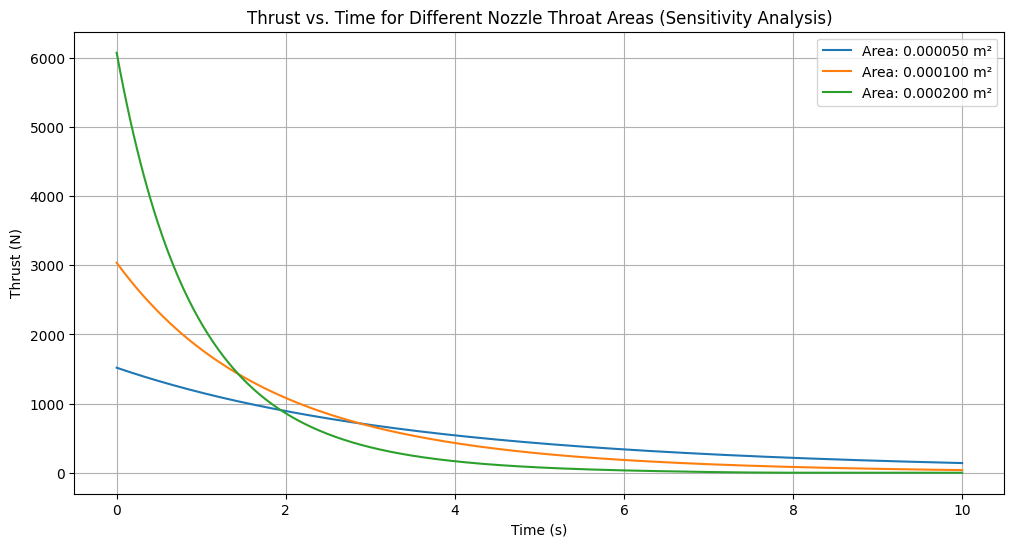


Based on the sensitivity analysis plot:
- Increasing the nozzle throat area leads to a higher initial thrust and a shorter blowdown duration.
- This behavior is physically reasonable: a larger opening allows gas to escape faster, generating more initial momentum but depleting the cylinder's contents sooner.
 
Potential areas for model refinement if external data were available:
- The rate of thrust decay for different areas could be compared to experimental data. If the model predicts a decay that is too fast or too slow compared to reality, it might indicate issues with the mass flow rate or temperature decay models.
- The peak thrust values could be compared. Discrepancies might suggest inaccuracies in the discharge coefficient or the choked flow model.
- The total impulse (area under the thrust curve) could be compared. Differences here might point to errors in the overall energy or mass conservation implementations.
- The model assumes isentropic expansion. Real nozzle flows invol

In [ ]:
# 5. Plot the results of the sensitivity analysis.
plt.figure(figsize=(12, 6))

for area, (time_points, thrust_over_time) in simulation_results.items():
    plt.plot(time_points, thrust_over_time, label=f'Area: {area:.6f} m²')

plt.xlabel("Time (s)")
plt.ylabel("Thrust (N)")
plt.title("Thrust vs. Time for Different Nozzle Throat Areas (Sensitivity Analysis)")
plt.legend()
plt.grid(True)
plt.show()

# 6. Based on the visual assessment, offer potential areas for refinement.
print("\nBased on the sensitivity analysis plot:")
print("- Increasing the nozzle throat area leads to a higher initial thrust and a shorter blowdown duration.")
print("- This behavior is physically reasonable: a larger opening allows gas to escape faster, generating more initial momentum but depleting the cylinder's contents sooner.")
print(" ")
print("Potential areas for model refinement if external data were available:")
print("- The rate of thrust decay for different areas could be compared to experimental data. If the model predicts a decay that is too fast or too slow compared to reality, it might indicate issues with the mass flow rate or temperature decay models.")
print("- The peak thrust values could be compared. Discrepancies might suggest inaccuracies in the discharge coefficient or the choked flow model.")
print("- The total impulse (area under the thrust curve) could be compared. Differences here might point to errors in the overall energy or mass conservation implementations.")
print("- The model assumes isentropic expansion. Real nozzle flows involve losses. Comparing predicted vs. experimental thrust could help determine if a more complex nozzle efficiency model is needed, perhaps dependent on the pressure ratio or Mach number.")
print("- The model assumes adiabatic cylinder conditions. Heat transfer from the environment could affect temperature decay and thus pressure and mass flow rate, especially over longer blowdown times.")
print("- The ideal gas assumption might break down at very high pressures. Real gas effects could be significant and comparing to data might highlight this need for a more complex equation of state.")


## Summary:

### Data Analysis Key Findings

*   The blowdown process of a pressurized gas cylinder is governed by the principles of Conservation of Mass, Conservation of Energy, and Conservation of Momentum.
*   Key equations for modeling the blowdown include isentropic flow relations, the mass flow rate equation, and the thrust equation ($F = \dot{m} V_e + (P_e - P_a) A_e$).
*   The model utilizes simplifying assumptions such as uniform cylinder properties, isentropic nozzle flow, adiabatic cylinder process, ideal gas behavior, and quasi-steady nozzle flow.
*   The simulation defined realistic system parameters, including a cylinder volume of 0.05 m³, an initial pressure of 200 bar, and a nozzle throat area of 1 cm².
*   Numerical integration of the governing ordinary differential equations showed a significant decrease in cylinder mass and temperature over the 10-second simulation period, as expected during a blowdown.
*   The calculated thrust starts at approximately 3038 N and decreases over time, reaching around 38 N by the end of the simulation.
*   A sensitivity analysis varying the nozzle throat area confirmed physically reasonable behavior: increasing the area led to a higher initial thrust and a shorter blowdown duration.

### Insights or Next Steps

*   While direct comparison to external data was not possible, the sensitivity analysis provides confidence in the model's qualitative behavior. The next step would be to compare the model's quantitative predictions (peak thrust, thrust decay rate, total impulse) against experimental data to identify specific areas for refinement, such as the mass flow rate model, temperature decay, or the need for a more complex nozzle efficiency model.
*   Further model refinement could explore relaxing some simplifying assumptions, such as incorporating heat transfer effects on the cylinder temperature or using a real gas equation of state for high-pressure conditions, based on the insights gained from comparing predictions to experimental results.


In [1]:
## Cylinder Blowdown Model
This notebook contains a simple bulk model for the blowdown of a pressurized gas cylinder through a orifice at one of the ends.  While the model is bulk in that the gas within the cylinder is always assumed to be at uniform pressure and temperature, it is dynamic in that the pressure and temperature change with time as the cylinder gas escapes.  Also, the ratio of the orifice to cylinder cross sectional areas are assumed to be small so that the velocity of the gas in the cylinder is small enough that it may be negelected.

## 1. Physical Principles:
The blowdown process is governed by the principles of:
- **Conservation of Mass**: The rate of change of mass within the cylinder is equal to the negative of the mass flow rate out of the nozzle.
- **Conservation of Energy**: The rate of change of internal energy within the cylinder is related to the work done by the gas escaping through the nozzle and the heat transfer (often assumed negligible for a simple model).
- **Conservation of Momentum**: While not directly used for the cylinder properties as it assumed that the velocity/momentum of the gases in the cyclinder are negligible, conservation of momentum is fundamental to determining the thrust force generated by the escaping gas.

## 2. Key Equations for Compressible Flow through a Nozzle:
- **Isentropic Flow Relations**: These relate the properties (pressure, temperature, density, velocity) of the gas at different points in the nozzle assuming an isentropic (reversible and adiabatic) expansion.
  - *Stagnation (cylinder) properties*:
    - $T_0$
    - $P_0$
    - $\rho_0$
- Local properties: T, P, rho, V, M (Mach number)
- Relations like $T/T_0 = (1 + (\gamma-1)/2 \cdot M^2)^{-1}$, $P/P_0 = (1 + (\gamma-1)/2 \cdot M^2)^{-(\gamma/(\gamma-1))}$, $\rho/\rho_0 = (1 + (\gamma-1)/2 \cdot M^2)^{-(1/(\gamma-1))}$
- Mass Flow Rate: For isentropic flow through an area A, the mass flow rate ($\dot{m}$) is given by:
$$\dot{m} = \rho \cdot A \cdot V = \rho \cdot A \cdot M \cdot \sqrt{\gamma \cdot R \cdot T}$$
- Choked Flow: Occurs when the flow reaches sonic velocity (M=1) at the nozzle throat. The mass flow rate is maximized and is independent of the downstream pressure for a given upstream pressure.
- The critical pressure ratio ($P_{throat}/P_0$) for choked flow is $((\gamma + 1)/2)^{-(\gamma/(\gamma-1))}$

## 3. Equation for Thrust:
The thrust (F) generated by the escaping gas is given by the momentum equation:
$$F = \dot{m} \cdot V_e + (P_e - P_a) \cdot A_e$$
Where:
- $\dot{m}$ is the mass flow rate
- $V_e$ is the exit velocity of the gas
- $P_e$ is the exit pressure of the gas
- $P_a$ is the ambient pressure
- $A_e$ is the exit area of the nozzle

## 4. Simplifying Assumptions for a "Simple Bulk Model":
- Uniform properties within the cylinder: Pressure and temperature are uniform throughout the cylinder at any given time.
- Isentropic expansion through the nozzle: The flow through the nozzle is assumed to be isentropic.
- Adiabatic process in the cylinder: No heat transfer to or from the cylinder.
- Ideal gas behavior: The gas is assumed to behave as an ideal gas ($PV = mRT$).
- Quasi-steady flow through the nozzle: At any given time, the flow through the nozzle is assumed to be steady, based on the instantaneous cylinder conditions.

## 5. How these principles and equations will be used:
The conservation of mass and energy will be used to develop ordinary differential equations (ODEs) that describe the rate of change of mass and temperature (and thus pressure via the ideal gas law) within the cylinder over time. The equations for compressible flow through a nozzle, including the choked flow condition, will be used to calculate the instantaneous mass flow rate out of the cylinder based on the cylinder's pressure and temperature. Finally, the thrust equation will be used to calculate the instantaneous thrust generated by the escaping gas using the mass flow rate and the nozzle exit conditions. These ODEs will then be solved numerically over time to simulate the blowdown process and determine the thrust profile.

SyntaxError: invalid syntax (ipython-input-2858669762.py, line 2)